In [13]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from kervis.utils import Model, Dataset, create_models
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, GraphletSampling, WeisfeilerLehman

In [2]:
def get_accuracy(models):
    results = []
    for model in models:
        results.append([model.name, model.evaluator.accuracy()])
    df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
    df = df.sort_values(by=['Accuracy'], ascending=True)
    return df

In [3]:
MUTAG = Dataset('MUTAG')
AIDS = Dataset('AIDS')

In [4]:
VH = VertexHistogram()
EH = EdgeHistogram()
SP = ShortestPath()
GS_3 = GraphletSampling(k=3)
GS_4 = GraphletSampling(k=4)
GS_5 = GraphletSampling(k=5)
WL_3 = WeisfeilerLehman(n_iter=3)
WL_4 = WeisfeilerLehman(n_iter=4)
WL_5 = WeisfeilerLehman(n_iter=5)

kernels = [VH, EH, SP, GS_3, GS_4, GS_5, WL_3, WL_4, WL_5]

In [5]:
models_MUTAG = create_models(kernels, MUTAG)
models_AIDS = create_models(kernels, AIDS)

In [6]:
for model in models_MUTAG.values(): model.evaluate()
for model in models_AIDS.values(): model.evaluate()

In [7]:
df_MUTAG = get_accuracy(models_MUTAG.values())
df_AIDS = get_accuracy(models_AIDS.values())

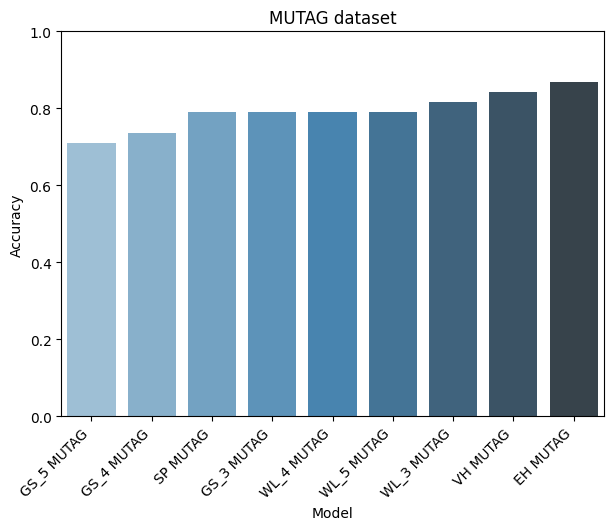

In [8]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(x='Model', y='Accuracy', data=df_MUTAG, palette='Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylim(0, 1)
ax.set_title('MUTAG dataset')
plt.savefig('./plots/result/MUTAG_accuracy.png', dpi=300, bbox_inches='tight')

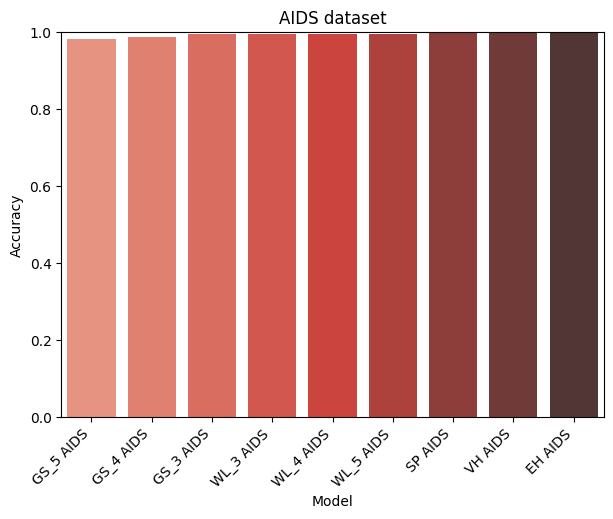

In [9]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(x='Model', y='Accuracy', data=df_AIDS, palette='Reds_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylim(0, 1)
ax.set_title('AIDS dataset')
plt.savefig('./plots/result/AIDS_accuracy.png', dpi=300, bbox_inches='tight')

In [10]:
# to save the confusion matrix in the plots/result/cm/ folder
for model in models_MUTAG.values(): model.evaluator.confusion_matrix()
for model in models_AIDS.values(): model.evaluator.confusion_matrix(cmap="Reds")

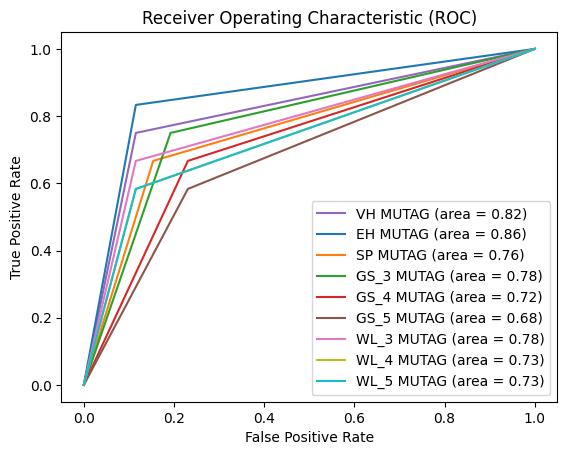

In [11]:
colors = ['tab:purple', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan']
for color, model in zip(colors, models_MUTAG.values()): model.evaluator.roc_curve(color)

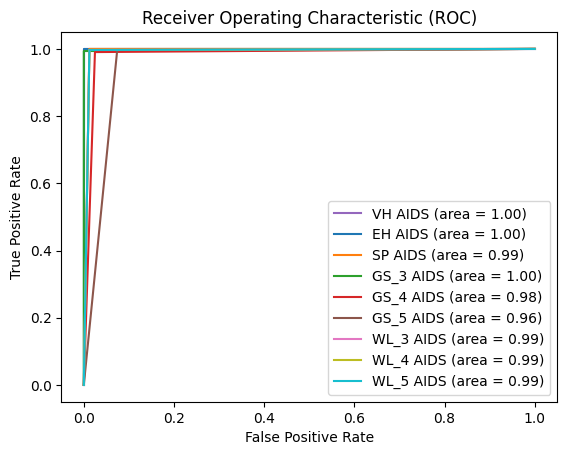

In [12]:
for color, model in zip(colors, models_AIDS.values()): model.evaluator.roc_curve(color)